<a href="https://colab.research.google.com/github/davis689/binder/blob/master/Michaelis_Menten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Enzyme Kinetics ##
The chemical kinetics that we have been studying is applicable to any type of reaction. However, enzyme kinetics makes a few modifications that make it useful for that application. 


The mechanism is
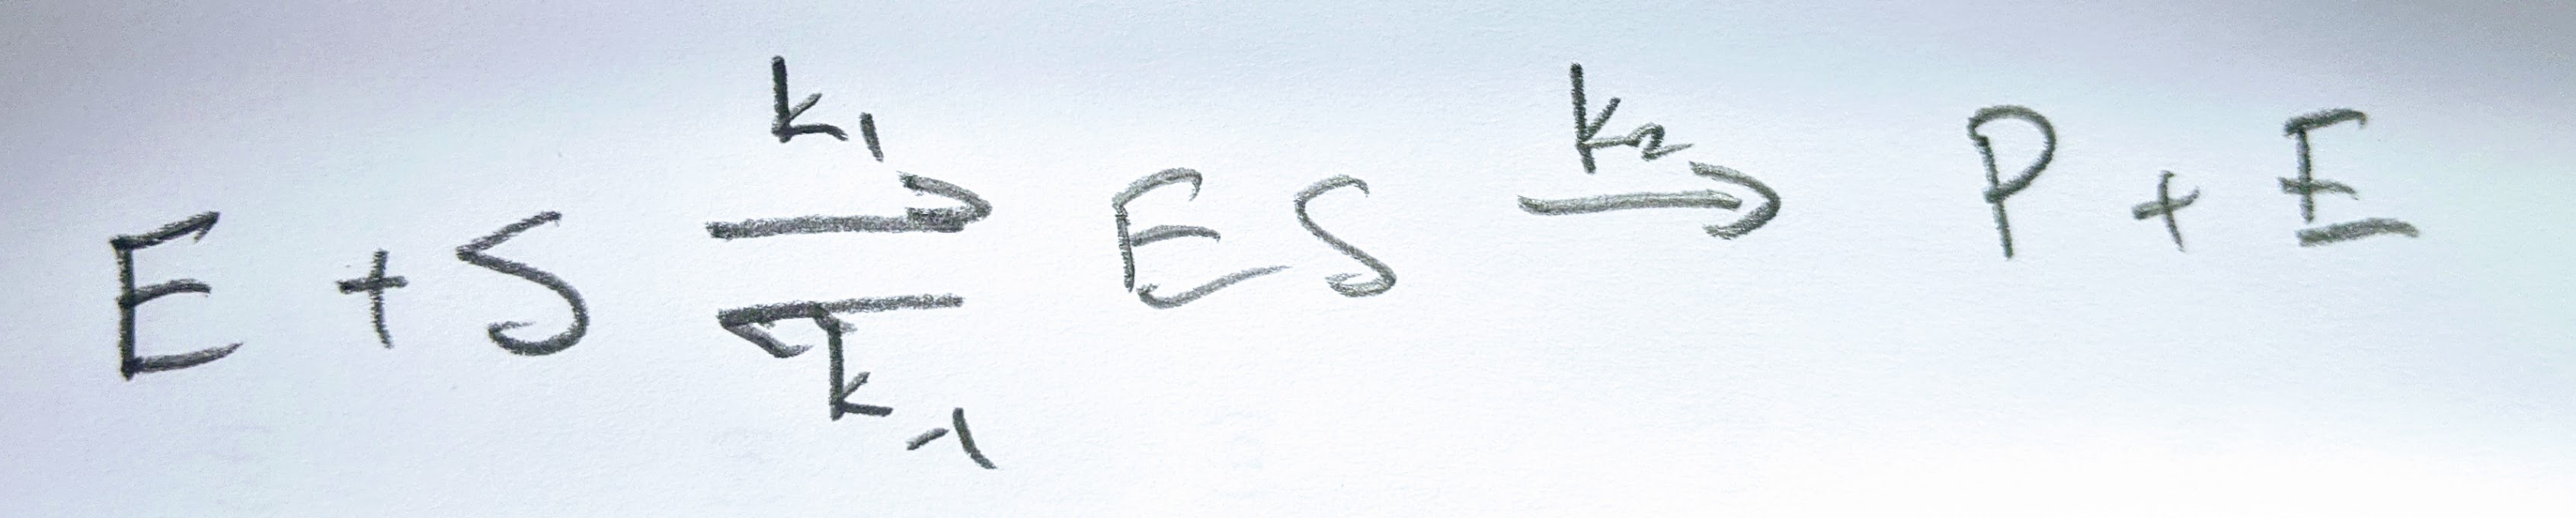

where E is the enzyme, S is the substrate, ES is the enzyme-substrate complex, and P is the product.

The rate of production of product is $$\dfrac{dP}{dt}=k_2[\rm{ES}]$$ There would be several forms of the enzyme. Since enzyme concentrations are typically low and it is difficult to distinguish between bound enzyme [ES] and free enzyme [E], it would be good to have our rate equation in terms of total enzyme, [E]$_o$.

Our rate equation shows that the rate will be greatest with more [ES].  Since the most [ES] we could possibly have is [E]$_o$, that will be the associated with the largest rate, $V_{max}$. We could write $$\dfrac{v_o}{V_{max}}=\dfrac{k_2[\rm{ES}]}{k_2[\rm{E}]_o}=\dfrac{[\rm{ES}]}{[\rm{E}]_o}$$

Now we can write $[\rm{E}]_o$=$[\rm{E}]$+$[\rm{ES}]$ since the total is the sum of the parts. Let's now use the steady-state approximation to determine the concentration of the enzyme-substrate complex in terms of reactant concentrations.

$$\dfrac{d[ES]}{dt}=k_1[\rm{E}][\rm{S}]-k_{-1}[\rm{ES}]-k_2[\rm{ES}]\approx0$$
Solving for [ES] gives $$[\rm{ES}]=\dfrac{k_1}{k_{-1}+k_2}[\rm{E}][\rm{S}]$$

Substitution of this expression and [E]$_o$ in terms of [E] and [ES} into the $\frac{v_o}{V_{max}}$ equation above (and multiplying by $V_{max}$ gives $$v_o=\dfrac{V_{max}\dfrac{k_1}{k_{-1}+k_2}[\rm{E}][\rm{S}]}{[\rm{E}]+\dfrac{k_1}{k_{-1}+k_2}[\rm{E}][\rm{S}]}\\=\dfrac{V_{max}\dfrac{k_1}{k_{-1}+k_2}[\rm{S}]}{1+\dfrac{k_1}{k_{-1}+k_2}[\rm{S}]}\\=\dfrac{V_{max}[\rm{S}]}{\dfrac{k_{-1}+k_2}{k_1}+[\rm{S}]}
$$
Call the ratio of rate constants in the denominator $K_M$ and we've got the [Michaelis-Menten equation](https://en.wikipedia.org/wiki/Michaelis%E2%80%93Menten_kinetics). $$v_o=\dfrac{V_{max}[\rm{S}]}{K_M+[\rm{S}]}$$

Let's define a function to calculate the rate for a given $K_M$ and $V_{max}$.

In [3]:
def MM(S,Km,Vmax): # define Michaelis-Menten equation
  return Vmax*S/(Km+S)

In [4]:
#@title Enter Michaelis-Menten parameters
Km = 1 #@param {type:"number"}
Vmax = 2 #@param {type:"number"}
S=np.linspace(0.01,10.01,100)


Now let's plot the results with changing substrate, [S], concentration.

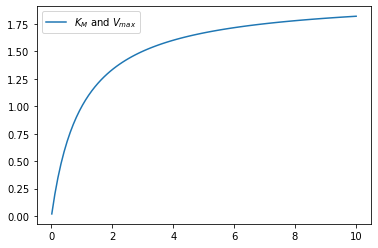

In [5]:
plt.plot(S,MM(S,Km,Vmax),label='$K_M$ and $V_{max}$')

plt.legend()
plt.show()

Let's look at the effect of changing the parameters. First, what do the parameters do?

$K_M$ is called the Michaelis constant. It is an equilibrium constant. And specically and importantly is a *dissociation* constant. That means that we're looking at the  first step *backwards* in the mechanism above. So a big $K_M$ means a lot of dissociation and a small one means a lot of bound enzyme, ES, is formed. 

So, a reaction with a larger $K_M$ should have less [ES] around and, therefore, be slower than one with a smaller $K_M$. Is that what we seen in the graph?

A larger $V_{max}$ means a rate that levels off at a higher level.

What will happen if $K_M$ is multiplied by 10?

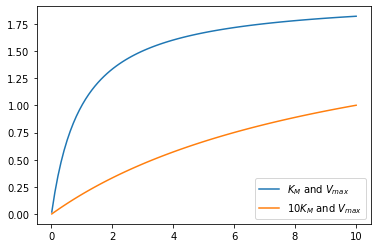

In [6]:
plt.plot(S,MM(S,Km,Vmax),label='$K_M$ and $V_{max}$')
plt.plot(S,MM(S,Km*10,Vmax),label='$10K_M$ and $V_{max}$')

plt.legend()
plt.show()

You see that the rate never gets as high for the 10$\times K_M$ plot. Maybe we should plot it for a larger range of [S]...

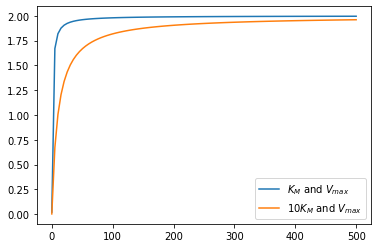

In [7]:
S=np.linspace(0.01,500,100)
plt.plot(S,MM(S,Km,Vmax),label='$K_M$ and $V_{max}$')
plt.plot(S,MM(S,Km*10,Vmax),label='$10K_M$ and $V_{max}$')

plt.legend()
plt.show()

You can see that both plots appear to asymptotically approach $V_{max}$ at high [S]. 

What happens when we change $V_{max}$?

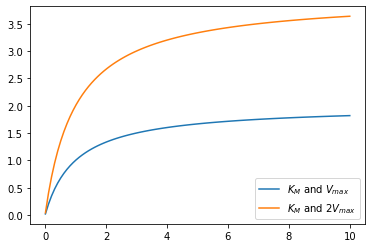

In [8]:
S=np.linspace(0.01,10,100)
plt.plot(S,MM(S,Km,Vmax),label='$K_M$ and $V_{max}$')
plt.plot(S,MM(S,Km,2*Vmax),label='$K_M$ and 2$V_{max}$')

plt.legend()
plt.show()

Seems reasonable, right?

If we have enzyme kinetics data, fitting it to the model can get us $K_M$ and $V_{max}$.


# Generating and fitting data

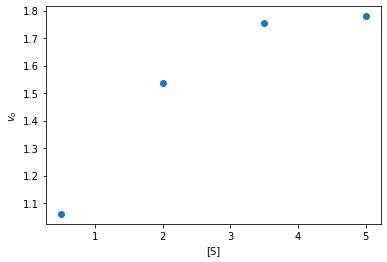

In [9]:
import random
S_data=[.5,2,3.5,5]
v0=[MM(s,Km,Vmax) for s in S_data]
err=[0.4*random.random() for i in range(len(S_data))]
v_real=[v0[i]+err[i] for i in range(len(S_data))]

plt.scatter(S_data,v_real)
plt.xlabel('[S]')
plt.ylabel(r'$v_o$')
plt.show()

In [10]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(MM, S_data, v_real)
print(popt,[Km,Vmax])

[0.42191345 1.92512113] [1, 2]


In [11]:
def recMM(recS,Km,Vmax):
  return Km/Vmax*recS+1/Vmax

In [12]:
recS=[1/s for s in S_data] # fit reciprocal linear version
recv=[1/v for v in v_real]
popt2,pcov2=curve_fit(recMM,recS,recv)
print([popt2[0],popt2[1]],[Km,Vmax])

[0.4021011700889125, 1.9075245520939565] [1, 2]


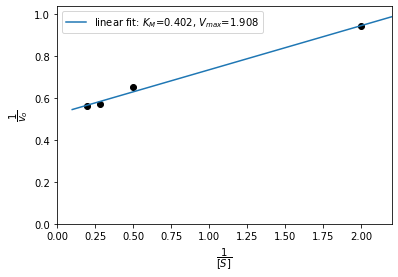

In [13]:
plt.plot(1/S,popt2[0]/popt2[1]/S+1/popt2[1],label='linear fit: $K_M$=%5.3f, $V_{max}$=%5.3f' % tuple(popt2)) 
plt.ylim(0,max(recv)*1.1)
plt.xlim(0,max(recS)*1.1)
plt.scatter(recS,recv,color='black')
plt.xlabel(r'$\dfrac{1}{[S]}$')
plt.ylabel(r'$\dfrac{1}{v_o}$')
plt.legend()
plt.show()

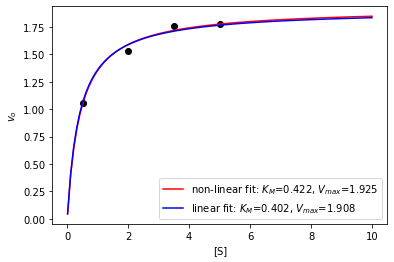

In [14]:
plt.scatter(S_data,v_real,color='black')

plt.plot(S,MM(S, *popt),'r',label='non-linear fit: $K_M$=%5.3f, $V_{max}$=%5.3f' % tuple(popt))
plt.plot(S,MM(S,*popt2),'b',label='linear fit: $K_M$=%5.3f, $V_{max}$=%5.3f' % tuple(popt2))
plt.xlabel('[S]')
plt.ylabel(r'$v_o$')
plt.legend()
plt.show()

The non-linear and linear fits give pretty similar results.

# Fitting Data

First we set up the data. This data is generated for a system with $K_M$= 4 and $V_{max}$=10. We hope to be able to extract these values from the data.


In [15]:
S_expt=[0.253,0.505,1.01,1.515,2.02,3.03,4.04,6.06,10.1]
v_expt=[0.751,0.999,1.719,3.033,3.152,4.58,4.874,6.201,7.077]

In [16]:
from scipy.optimize import curve_fit


We use ```curvefit``` to do the job. The first argument is the function we want to use. The second and third arguments are the $x$ and $y$ data in the form of lists. Two results are returned. The two fit parameters are here saved into ```popt```. The covariance matrix is also returned and here stored in ```pcov```. 



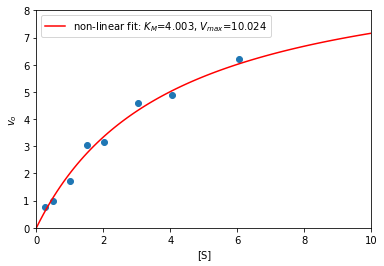

In [17]:
popt, pcov = curve_fit(MM, S_expt, v_expt) #curve fit

plt.scatter(S_expt,v_expt) # plot the data
plt.plot(S,MM(S, *popt),'r',label='non-linear fit: $K_M$=%5.3f, $V_{max}$=%5.3f' % tuple(popt)) #plot the curve. 
# %5.3f formats the number so that there are potentially 5 digits before the decimal place and 3 after. And the source is from the tuple 'popt'.
plt.legend()
plt.xlabel('[S]')
plt.ylabel(r'$v_o$')
plt.xlim(0,10)
plt.ylim(0,8)
plt.show()


It is also possible to fit a linearized version of the Michaelis-Menten equation. Take the reciprocal of both sides and get $$\dfrac{1}{v_o}=\dfrac{K_M}{V_{max}}\dfrac{1}{[S]} + \dfrac{1}{V_{max}}$$

Let's fit our data using this form too.

In [ ]:
def recMM(recS,Km,Vmax): # define function for this form of the equation
  return Km/Vmax*recS+1/Vmax

In [40]:
recS=[1/s for s in S_expt] # reciprocal of [S]
recv=[1/v for v in v_expt] # reciprocal of rate

popt2,pcov2=curve_fit(recMM,recS,recv) # do curve fit
#popt2,pcov2=curve_fit(recMM,recS[1:],recv[1:]) # as we'll see below, removing the lowest concentration point, might improve the fit

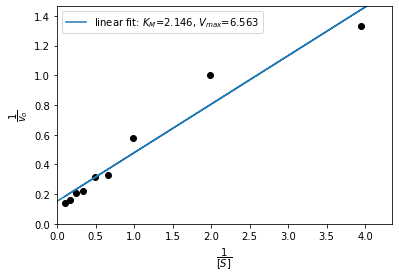

In [41]:
plt.plot(1/S,popt2[0]/popt2[1]/S+1/popt2[1],label='linear fit: $K_M$=%5.3f, $V_{max}$=%5.3f' % tuple(popt2)) 
plt.ylim(0,max(recv)*1.1)
plt.xlim(0,max(recS)*1.1)
plt.scatter(recS,recv,color='black')
plt.xlabel(r'$\dfrac{1}{[S]}$')
plt.ylabel(r'$\dfrac{1}{v_o}$')
plt.legend()
plt.show()

Now we'll use the results of both fits to compare to the original data. 

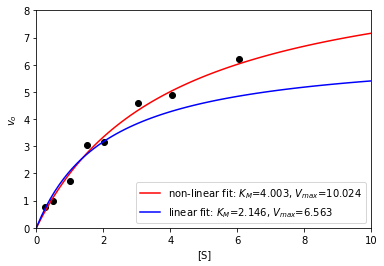

In [42]:
plt.scatter(S_expt,v_expt,color='black')
plt.plot(S,MM(S, *popt),'r',label='non-linear fit: $K_M$=%5.3f, $V_{max}$=%5.3f' % tuple(popt))
plt.plot(S,MM(S,*popt2),'b',label='linear fit: $K_M$=%5.3f, $V_{max}$=%5.3f' % tuple(popt2))
plt.xlabel('[S]')
plt.ylabel(r'$v_o$')
plt.xlim(0,10)
plt.ylim(0,8)
plt.legend()
plt.show()

Clearly one fit is better than the other. It seems ridiculous that the blue curve can possibly be right but look at the linear plot and it looks pretty reasonable. The effect of the double reciprocal plot is to squeeze all the high S concentration points close to each other (and therefore easy to fit pretty well with any line that comes close) and to spread the low concentration points far apart. This makes the low concentration points the most significant in determining the slope. That is not necessarily a good thing since the lowest concentration data points may not be the most reliable data points.

In days of old, a linear fit might have been the best choice because it was easier. A linear regression program or even a calculator could accomplish it and non-linear fits were harder. That isn't true anymore and it's important to maintain some skepticism about the results of a double-reciprocal plot. Make sure to plot the data in the non-reciprocal form to evaluate the fit.

# Inhibition

We can treat inhibition of the Michaelis-Menten rate with some modifications of our derivation from above. First the mechanism will look like this.

In [21]:
def MMI(S,Km,Vmax,I,KI1,KI2): # define Michaelis-Menten equation with inhibition
  return Vmax*S/(Km*(1+I/KI1)+S*(1+I/KI2))

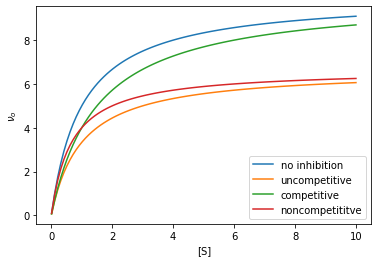

In [22]:
plt.plot(S,MMI(S,1,10,0,10,10),label='no inhibition')
plt.plot(S,MMI(S,1,10,5,10,10),label='uncompetitive')
plt.plot(S,MMI(S,1,10,5,10,1e10),label='competitive')
plt.plot(S,MMI(S,1,10,5,1e10,10),label='noncompetititve')
plt.legend()
plt.xlabel('[S]')
plt.ylabel(r'$\nu_o$')
plt.show()

(0.0, 2.0)

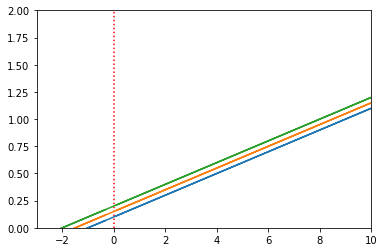

In [23]:
#uncompetitive
S=np.linspace(-3,10.01,100)

plt.plot(1/S,1/MMI(S,1,10,0,10,10))
plt.plot(1/S,1/MMI(S,1,10,5,1e10,10))
plt.plot(1/S,1/MMI(S,1,10,10,1e10,10))
plt.vlines(0,0,10,linestyles='dotted',color='red')
plt.xlim(-3,10)
plt.ylim(0,2)

(0.0, 2.0)

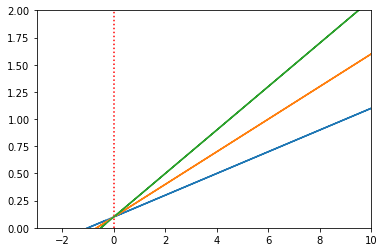

In [24]:
#Competitive
plt.plot(1/S,1/MMI(S,1,10,0,10,10))
plt.plot(1/S,1/MMI(S,1,10,5,10,1e10))
plt.plot(1/S,1/MMI(S,1,10,10,10,1e10))
plt.vlines(0,0,10,linestyles='dotted',color='red')
plt.xlim(-3,10)
plt.ylim(0,2)

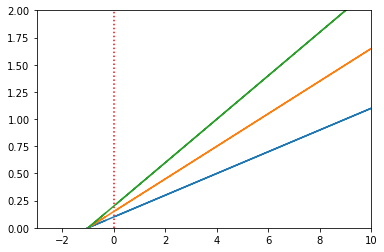

In [25]:
#nonompetitive
plt.plot(1/S,1/MMI(S,1,10,0,10,10))
plt.plot(1/S,1/MMI(S,1,10,5,10,10))
plt.plot(1/S,1/MMI(S,1,10,10,10,10))
plt.vlines(0,0,10,linestyles='dotted',color='red')
plt.xlim(-3,10)
plt.ylim(0,2)
plt.show()

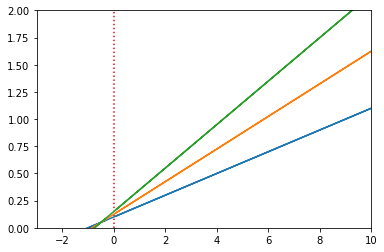

In [26]:
#mixed
plt.plot(1/S,1/MMI(S,1,10,0,10,20))
plt.plot(1/S,1/MMI(S,1,10,5,10,20))
plt.plot(1/S,1/MMI(S,1,10,10,10,20))
plt.vlines(0,0,10,linestyles='dotted',color='red')
plt.xlim(-3,10)
plt.ylim(0,2)
plt.show()

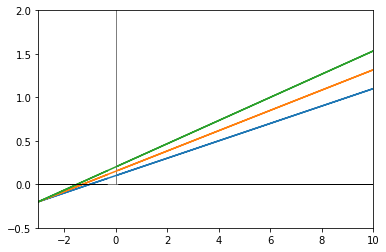

In [27]:
#mixed
plt.plot(1/S,1/MMI(S,1,10,0,30,10))
plt.plot(1/S,1/MMI(S,1,10,5,30,10))
plt.plot(1/S,1/MMI(S,1,10,10,30,10))
plt.vlines(0,0,10,linewidth=.5,color='black')
plt.plot(1/S,np.zeros(100),color='black',linewidth=.5)
plt.xlim(-3,10)
plt.ylim(-.5,2)
plt.show()

In [28]:
def MMS(S,Km,Vmax,KS): # define Michaelis-Menten equation with substrate inhibition
  return Vmax*S/(Km+S*(1+S/KS))

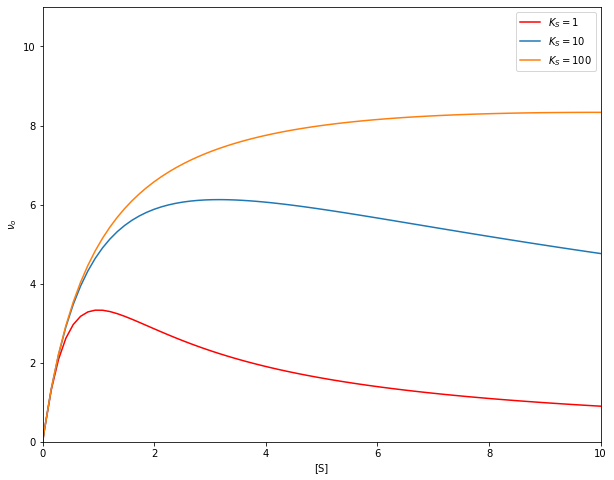

In [29]:
plt.figure(figsize=(10,8))
plt.plot(S,MMS(S,1,10,1),label='$K_S=$1',color='red')
plt.plot(S,MMS(S,1,10,10),label='$K_S=$10')
plt.plot(S,MMS(S,1,10,100),label='$K_S=$100')


plt.xlim(0,10)
plt.ylim(0,11)
plt.legend()
plt.xlabel('[S]')
plt.ylabel(r'$\nu_o$')
plt.savefig('subsinh.png')
plt.show()
